# import

In [1]:
from typing import List, Tuple, Union, TypedDict, Optional
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree

# functions

In [2]:
class FileInfo(TypedDict):
    path: str
    label: str
    offset: float
    color: Union[str, Tuple[float, float, float]]
    connect: bool
    smooth_window: Optional[float]
    subsample_rate: Optional[int]
    x_factor: Optional[float]

In [3]:
def smooth_data(
    data: pd.DataFrame, x_col: str, y_col: str, x_range: float
) -> pd.Series:
    """x軸の範囲でデータを平滑化する"""
    # KDTreeを使用して効率的に範囲内の点を探す
    tree = cKDTree(data[[x_col]].values)
    smoothed_y = []

    # 各 x の位置で、x_range の範囲内の y 値の平均を計算
    for i, x in enumerate(data[x_col]):
        idx = tree.query_ball_point(x, x_range / 2)
        in_range = data.iloc[idx]
        smoothed_y.append(in_range[y_col].mean())

    return pd.Series(smoothed_y, index=data.index)


In [4]:
def plot_data_with_options(
    file_info: List[FileInfo],
    x_col: str = "X",
    y_col: str = "Y",
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
):
    """
    複数のファイルを読み込み、各ファイルの指定された列で同じキャンバス上に散布図を重ねて描画する関数

    Parameters:
    - file_info (List[FileInfo]): 各ファイルに関する情報のリスト
    - x_col (str): x軸に使用する列の名前（デフォルトは 'X'）
    - y_col (str): y軸に使用する列の名前（デフォルトは 'Y'）
    - xlim (Optional[Tuple[float, float]]): x軸の表示範囲（デフォルトは None）
    - ylim (Optional[Tuple[float, float]]): y軸の表示範囲（デフォルトは None）
    """
    # キャンバスの準備
    plt.figure(figsize=(8, 6))

    # 各ファイルに対して散布図を作成
    for info in file_info:
        file_path = info["path"]
        label = info.get("label", None)
        offset = info.get("offset", 0)
        color = info.get("color", None)
        connect = info.get("connect", False)
        smooth_window = info.get("smooth_window", None)
        subsample_rate = info.get("subsample_rate", 1)
        x_factor = info.get("x_factor", 1.0)

        # データの読み込み
        data = pd.read_csv(file_path, sep=r"\s+", header=None)
        data.columns = ["ID", y_col, x_col]

        # x軸にオフセットとスケールファクターを適用し、データをソート
        data[x_col] = data[x_col] * x_factor + offset
        data = data.sort_values(by=x_col)

        # サブサンプリング
        if subsample_rate > 1:
            data = data[::subsample_rate]

        # 平滑化が必要な場合
        if smooth_window and connect:
            data[y_col] = smooth_data(data, x_col, y_col, smooth_window)

        # 点同士を線で結ぶ
        if connect:
            plt.plot(
                data[x_col],
                data[y_col],
                color=color,
                linestyle="-",
                linewidth=3,
                label=label,
            )
        # 散布図を描画
        else:
            plt.scatter(data[x_col], data[y_col], s=10, label=label, color=color)

    # 軸範囲の設定
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    # グラフの設定
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
plt.rcParams.update(
    {
        "font.family": "Liberation Serif",
        "axes.labelsize": 20,
        "axes.titlesize": 20,
        "xtick.labelsize": 20,
        "ytick.labelsize": 20,
        "legend.fontsize": 14,
    }
)

# main

## tel1

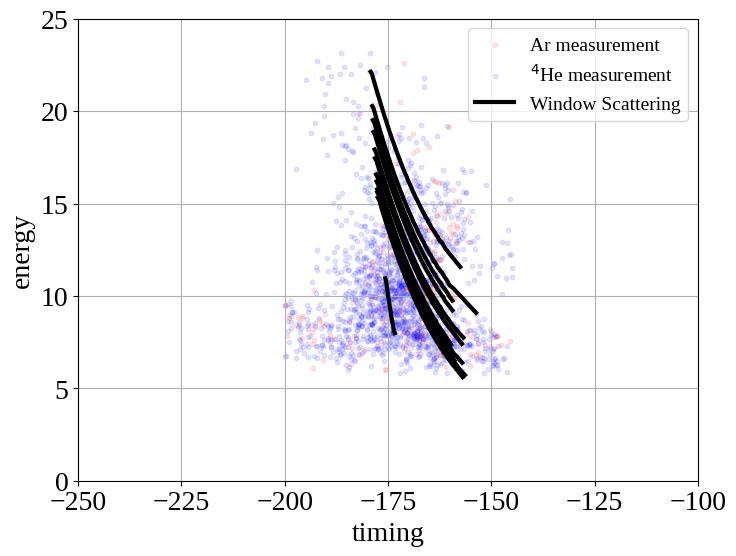

In [6]:
tel1_offset = -188.0
tel1_x_factor = 1.0

# tel1_offset = -200.0
# tel1_x_factor = 2.0

# tel1_offset = -220.0
# tel1_x_factor = 3.5

# tel1_offset = -240.0
# tel1_x_factor = 5.0

tel1_file_info = [
    {
        "path": "raw/bg/tel1_data.txt",
        "label": "Ar measurement",
        "color": (1.0, 0.0, 0.0, 0.1),
    },
    {
        "path": "raw/phys/tel1_data.txt",
        "label": r"$^4$He measurement",
        "color": (0.0, 0.0, 1.0, 0.1),
    },
    {
        "path": "raw/window/tel1.txt",
        "label": "Window Scattering",
        "offset": tel1_offset,
        "x_factor": tel1_x_factor,
        "color": "black",
        "connect": True,
        "smooth_window": 0.3,
        "subsample_rate": 10,
    },
]

apx_range = (0, 10, 20)
for i in range(10 + 1):
    tel1_file_info.append(
        {
            "path": f"raw/apx/tel1/ap{i}.txt",
            # "label": f"ap{i}",
            "offset": tel1_offset,
            "x_factor": tel1_x_factor,
            "color": "black",
            "connect": True,
            "smooth_window": 0.6,
            "subsample_rate": 10,
        }
    )
plot_data_with_options(
    tel1_file_info, "timing", "energy", xlim=(-250.0, -100.0), ylim=(0.0, 25.0)
)
# plot_data_with_options(tel1_file_info, "timing", "energy", ylim=(0.0, 25.0))

## tel2

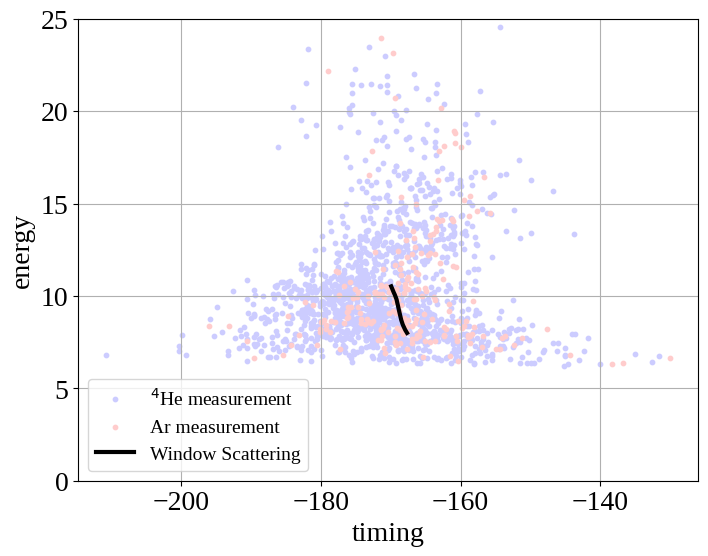

In [7]:
tel2_offset = -180.0
tel2_file_info = [
    {
        "path": "raw/phys/tel2_data.txt",
        "label": r"$^4$He measurement",
        "color": (0.8, 0.8, 1.0),
    },
    {
        "path": "raw/bg/tel2_data.txt",
        "label": "Ar measurement",
        "color": (1.0, 0.8, 0.8),
    },
    {
        "path": "raw/window/tel2.txt",
        "label": "Window Scattering",
        "offset": tel2_offset,
        "color": "black",
        "connect": True,
        "smooth_window": 1,
        "subsample_rate": 10,
    },
]

#for i in range(10):
#    tel2_file_info.append(
#        {
#            "path": f"raw/apx/tel2/ap{i}.txt",
#            # "label": f"ap{i}",
#            "offset": tel2_offset,
#            "color": "black",
#            "connect": True,
#            "smooth_window": 0.5,
#            "subsample_rate": 10,
#        }
#    )
plot_data_with_options(tel2_file_info, "timing", "energy", ylim=(0.0, 25.0))

## tel3

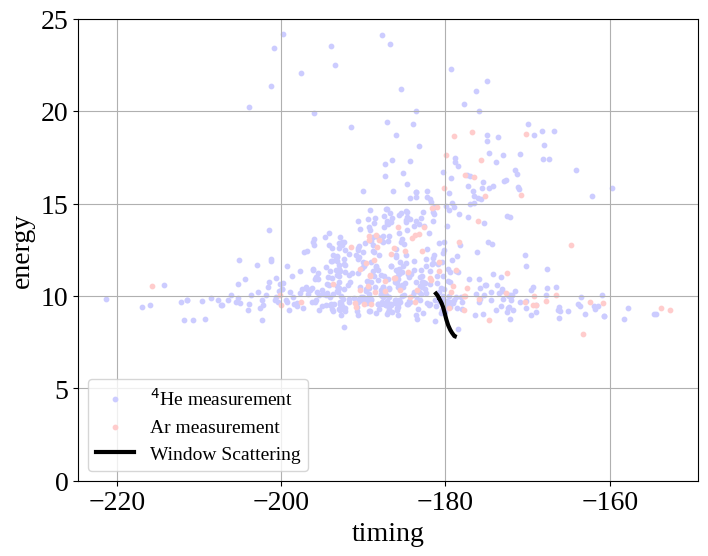

In [8]:
tel3_offset = -190.0
tel3_file_info = [
    {
        "path": "raw/phys/tel3_data.txt",
        "label": r"$^4$He measurement",
        "color": (0.8, 0.8, 1.0),
    },
    {
        "path": "raw/bg/tel3_data.txt",
        "label": "Ar measurement",
        "color": (1.0, 0.8, 0.8),
    },
    {
        "path": "raw/window/tel3.txt",
        "label": "Window Scattering",
        "offset": tel3_offset,
        "color": "black",
        "connect": True,
        "smooth_window": 1,
        "subsample_rate": 10,
    },
]

#for i in range(10):
#    tel3_file_info.append(
#        {
#            "path": f"raw/apx/tel3/ap{i}.txt",
#            # "label": f"ap{i}",
#            "offset": tel3_offset,
#            "color": "black",
#            "connect": True,
#            "smooth_window": 0.5,
#            "subsample_rate": 10,
#        }
#    )
plot_data_with_options(tel3_file_info, "timing", "energy", ylim=(0.0, 25.0))

## tel4

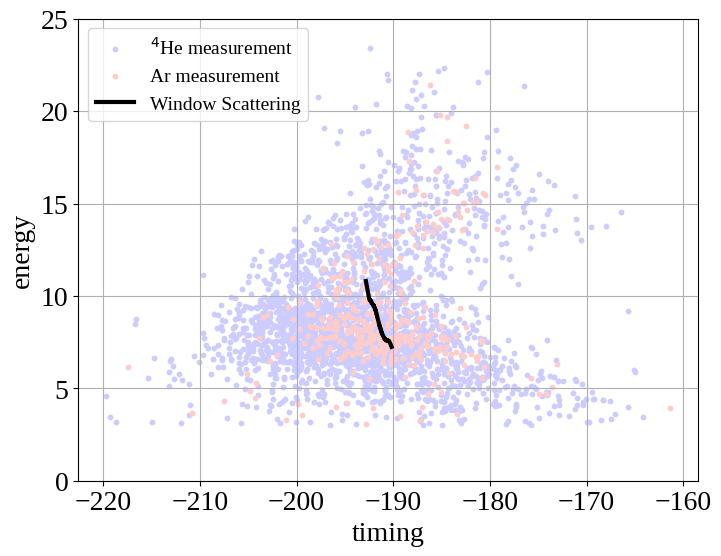

In [9]:
tel4_offset = -200.0
tel4_file_info = [
    {
        "path": "raw/phys/tel4_data.txt",
        "label": r"$^4$He measurement",
        "color": (0.8, 0.8, 1.0),
    },
    {
        "path": "raw/bg/tel4_data.txt",
        "label": "Ar measurement",
        "color": (1.0, 0.8, 0.8),
    },
    {
        "path": "raw/window/tel4.txt",
        "label": "Window Scattering",
        "offset": tel4_offset,
        "color": "black",
        "connect": True,
        "smooth_window": 0.3,
        "subsample_rate": 10,
    },
]

#for i in range(10):
#    tel4_file_info.append(
#        {
#            "path": f"raw/apx/tel4/ap{i}.txt",
#            # "label": f"ap{i}",
#            "offset": tel4_offset,
#            "color": "black",
#            "connect": True,
#            "smooth_window": 0.5,
#            "subsample_rate": 10,
#        }
#    )
plot_data_with_options(tel4_file_info, "timing", "energy", ylim=(0.0, 25.0))

## tel5

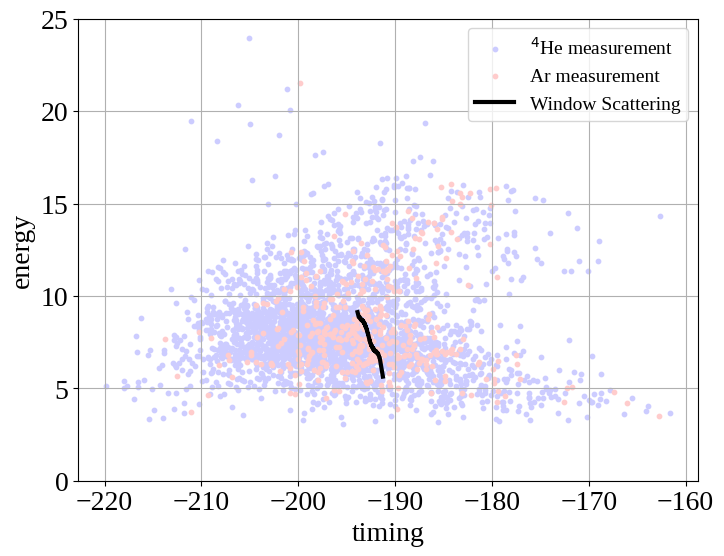

In [10]:
tel5_offset = -200.0
tel5_file_info = [
    {
        "path": "raw/phys/tel5_data.txt",
        "label": r"$^4$He measurement",
        "color": (0.8, 0.8, 1.0),
    },
    {
        "path": "raw/bg/tel5_data.txt",
        "label": "Ar measurement",
        "color": (1.0, 0.8, 0.8),
    },
    {
        "path": "raw/window/tel5.txt",
        "label": "Window Scattering",
        "offset": tel5_offset,
        "color": "black",
        "connect": True,
        "smooth_window": 0.3,
        "subsample_rate": 10,
    },
]

#for i in range(10):
#    tel5_file_info.append(
#        {
#            "path": f"raw/apx/tel5/ap{i}.txt",
#            # "label": f"ap{i}",
#            "offset": tel5_offset,
#            "color": "black",
#            "connect": True,
#            "smooth_window": 0.5,
#            "subsample_rate": 10,
#        }
#    )
plot_data_with_options(tel5_file_info, "timing", "energy", ylim=(0.0, 25.0))